## **Análise de Dados com Pandas**

In [1]:
import pandas as pd

In [2]:
data_frame = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv") #Kaggle

In [ ]:
data_frame.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
data_frame.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
data_frame.shape

(133349, 11)

In [ ]:
linhas, colunas = data_frame.shape[0], data_frame.shape[1]
print("Linhas:",linhas)
print("Colunas:", colunas)

Linhas: 133349
Colunas: 11


In [ ]:
data_frame.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

**Renomeando as colunas do DataFrame**

In [4]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
data_frame.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
data_frame.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
data_frame.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

**Analises**

In [ ]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
data_frame["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
data_frame["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [11]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
data_frame['senioridade'] = data_frame['senioridade'].replace(senioridade)
data_frame['senioridade'].value_counts()

,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


In [9]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
data_frame['contrato'] = data_frame['contrato'].replace(contrato)
data_frame['contrato'].value_counts()

,count
contrato,
integral,132563
contrato,394
parcial,376
freelancer,16


In [56]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

data_frame['remoto'] = data_frame['remoto'].replace(mapa_trabalho)
data_frame['remoto'].value_counts()

,count
remoto,
presencial,105312
remoto,27718
hibrido,319


In [57]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
data_frame['tamanho_empresa'] = data_frame['tamanho_empresa'].replace(tamanho_empresa)
data_frame['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
media,129561
grande,3574
pequena,214


In [16]:
data_frame.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,0,US,M


In [12]:
data_frame.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,95,3
top,senior,integral,Data Scientist,USD,US,US,M
freq,77241,132563,17314,126140,119579,119641,129561


In [13]:
data_frame.describe()

,ano,salario,usd,remoto
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


##**Preparação e limpeza dos Dados**

In [ ]:
data_frame.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_frame.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
data_frame['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
data_frame[data_frame.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,SE,FT,Product Manager,184500,USD,184500,US,0,US,M
59692,NaN,MI,FT,Engineer,110000,USD,110000,DE,0,DE,M
59710,NaN,EN,FT,Data Scientist,208800,USD,208800,US,0,US,M
59759,NaN,SE,FT,Software Engineer,135000,USD,135000,US,0,US,M
59789,NaN,SE,FT,Engineer,112000,USD,112000,US,0,US,M
131000,NaN,SE,FT,Machine Learning Engineer,163800,USD,163800,US,0,US,M
131006,NaN,SE,FT,Data Analytics Manager,204500,USD,204500,US,0,US,M
133054,NaN,EN,FT,Data Scientist,40000,USD,40000,JP,100,MY,L
133281,NaN,MI,FT,Machine Learning Engineer,180000,PLN,46597,PL,100,PL,L
133317,NaN,MI,FT,Data Scientist,130000,USD,130000,US,50,US,L


In [ ]:
import numpy as np

# Criando um dataframe de teste para exemplificar um preenchimento
data_frame_salarios = pd.DataFrame({
    'nome': ["Ana", "Francisco", "Maria", "Daniele", "Marcus"],
    'salario': [4000, np.nan, 5000, np.nan, 10000]
})

# Calcula a média salarial e substitui os nulos pela média e arrededonda os valores
data_frame_salarios['salario_media'] = data_frame_salarios['salario'].fillna(data_frame_salarios['salario'].mean().round(2))

# Calcula mediana e substitui os nulos pela mediana (evita outlier ou valor atípico)
data_frame_salarios['salario_mediana'] = data_frame_salarios['salario'].fillna(data_frame_salarios['salario'].median())

data_frame_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Francisco,NaN,6333.33,5000.0
2,Maria,5000.0,5000.00,5000.0
3,Daniele,NaN,6333.33,5000.0
4,Marcus,10000.0,10000.00,10000.0


In [ ]:
# Outro exemplo para teste
data_frame_temperatura = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

data_frame_temperatura["preenchido_ffill"] = data_frame_temperatura["Temperatura"].ffill() # Completa com o valor anterior (forward fill)
data_frame_temperatura

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [ ]:
data_frame_temperatura = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

data_frame_temperatura["preenchido_bfill"] = data_frame_temperatura["Temperatura"].bfill()

'''backfill é um método da biblioteca Pandas usado para preencher valores ausentes (NaN ou None), utilizando o valor válido mais próximo seguinte
  (da próxima linha ou coluna) para preencher os dados faltantes (resumindo: o valor "de baixo" preenche o valor "de cima")
'''
data_frame_temperatura

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [ ]:
data_frame_cidades = pd.DataFrame({
    'nome': ["Ana", "Francisco", "Maria", "Daniele", "Marcus"],
    'cidade': ["São Paulo", np.nan, "João Pessoa", np.nan, "Petrolina"]
})

data_frame_cidades['cidade_preenchida'] = data_frame_cidades['cidade'].fillna("Não informado")
data_frame_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Francisco,NaN,Não informado
2,Maria,João Pessoa,João Pessoa
3,Daniele,NaN,Não informado
4,Marcus,Petrolina,Petrolina


In [61]:
data_frame_limpo = data_frame.dropna()

In [62]:
data_frame_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [67]:
data_frame_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [66]:
data_frame_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [65]:
data_frame_limpo = data_frame_limpo.assign(ano = data_frame_limpo['ano'].astype("int64"))

## **Vizualização de Dados**

**Principais bibliotecas Python para Data Science:**

* Pandas (estruturação/análise)
* NumPy (cálculo numérico)
* Matplotlib e Seaborn (visualização)

In [14]:
data_frame_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

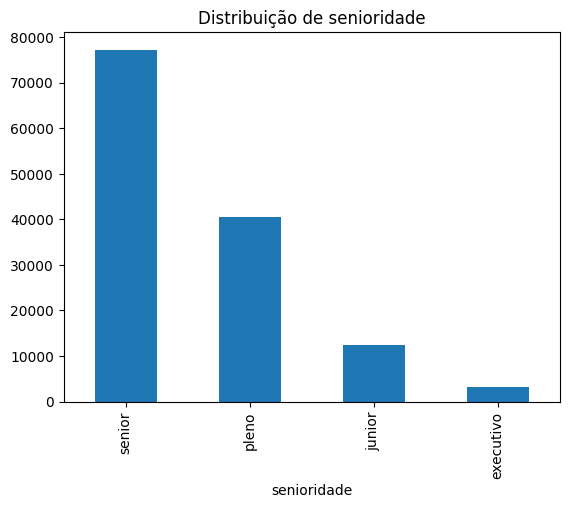

In [58]:
data_frame_limpo['senioridade'].value_counts().plot(kind="bar", title="Distribuição de senioridade") # Gráfico de barra

In [27]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

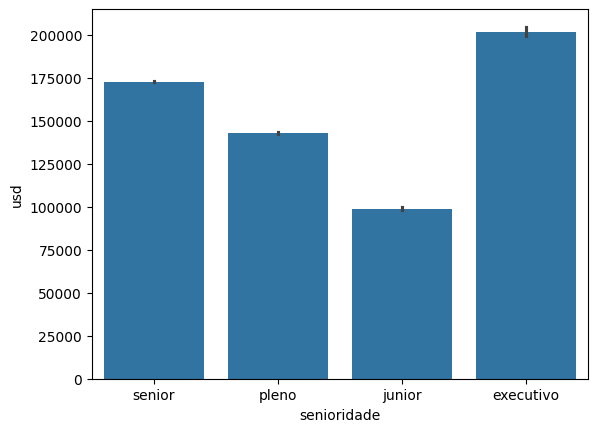

In [29]:
sns.barplot(data=data_frame_limpo, x='senioridade', y='usd')

In [30]:
import matplotlib.pyplot as plt

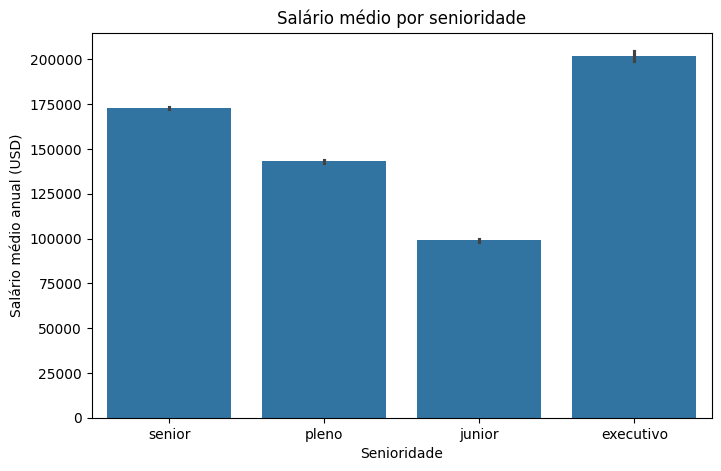

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data_frame_limpo, x='senioridade', y='usd')
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [33]:
data_frame_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
executivo,202027.667813
senior,172850.838301
pleno,143044.845979
junior,99034.963267


In [35]:
ordem = data_frame_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index # Melhora a clareza visual, facilitando a comparação e a identificação rápida das categorias
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

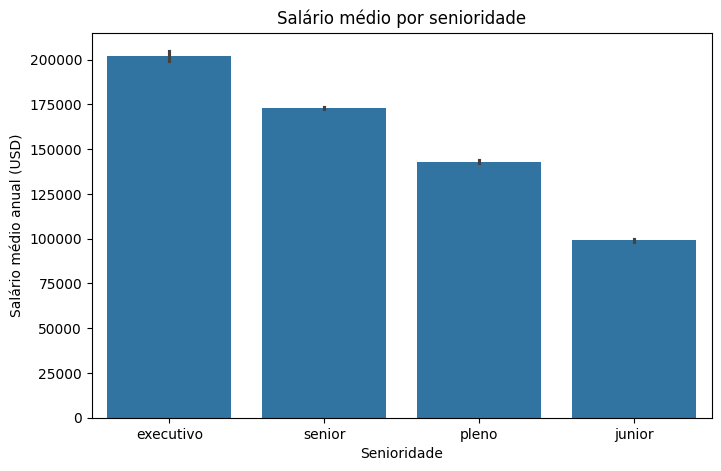

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data_frame_limpo, x='senioridade', y='usd', order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

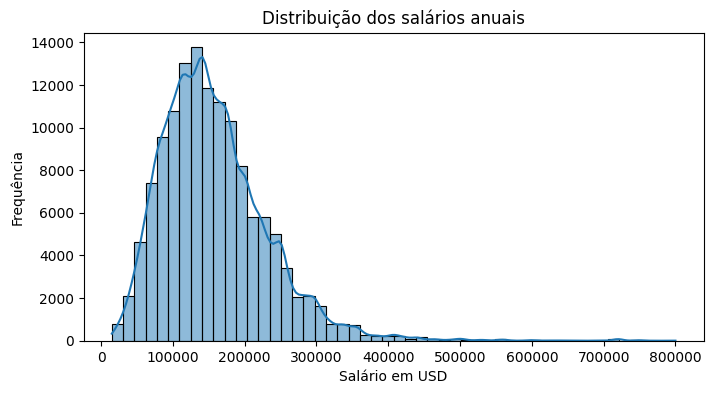

In [43]:
plt.figure(figsize=(8, 4))
sns.histplot(data_frame_limpo['usd'], bins=50, kde=True) # Histograma
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

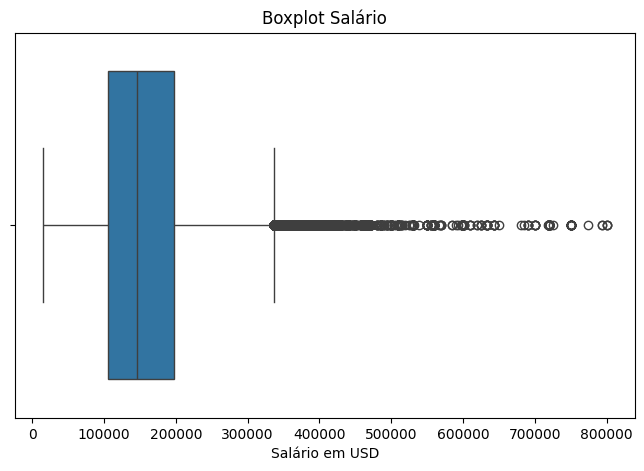

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data_frame_limpo['usd']) # Distribuição salarial
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()

**Análise do diagrama de caixa/boxplot:**

* **Caixa:** Agora, a largura da caixa representa o intervalo interquartílico (IQR) dos salários. A borda esquerda é o Primeiro Quartil (Q1) (25% dos salários estão abaixo), e a borda direita é o Terceiro Quartil (Q3) (75% dos salários estão abaixo).


* **Linha na caixa:** Esta linha vertical dentro da caixa ainda indica a Mediana (Q2), o salário central que divide os dados ao meio.


* **Hastes (Bigodes):** As linhas que se estendem horizontalmente da caixa vão até os salários mínimos e máximos, excluindo os outliers.


* **Outliers (Pontos/Asteriscos):** Os pontos individuais estão agora espalhados horizontalmente, representando salários extremos que estão significativamente mais à direita (salários muito altos) ou à esquerda (salários muito baixos) dos bigodes.

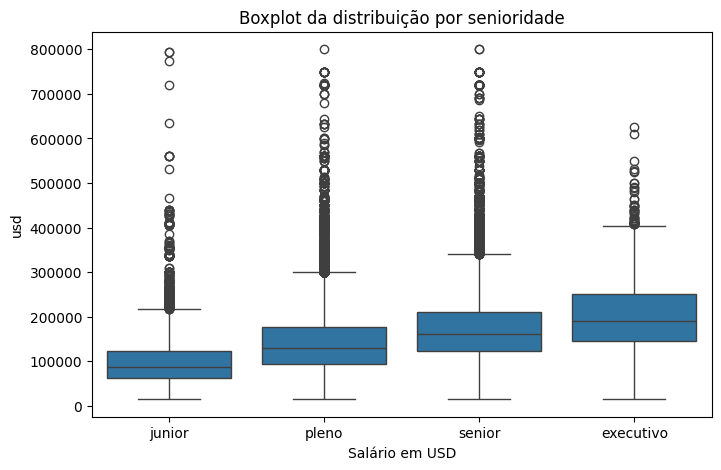

In [48]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=data_frame_limpo, order=ordem_senioridade) # Distribuição salarial por nível de senioridade
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

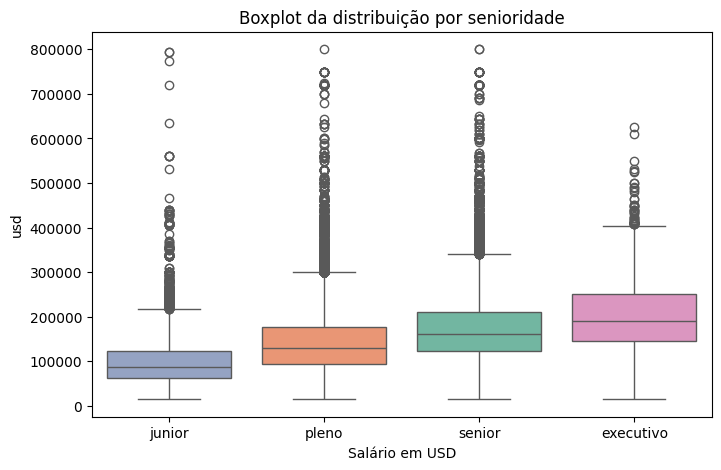

In [49]:
# Adicionando cores

ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=data_frame_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

In [51]:
import plotly.express as px

In [52]:
# Exemplo para teste de um gráfico de média salarial por senioridade em barras usando o plotly (para adicionar iteratividade)

senioridade_media_salario = data_frame_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

figure = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

figure.show()

In [68]:
remoto_contagem = data_frame_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

figure = px.pie(remoto_contagem, names='tipo_trabalho', values='quantidade', title='Proporção dos tipos de trabalho')
figure.show()

In [71]:
remoto_contagem = data_frame_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

figure = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5 # Com buraco
          )

figure.update_traces(textinfo='percent+label') # Adiciona texto com a porcentagem
figure.show()